# Investigation of Ford GoBike's trip data

## Introduction


### About the Dataset
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Note that this dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

In [3]:
df = pd.read_csv('baywheels.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [4]:
# I am computing the summary of statistics pertaining to the DataFrame columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,176799.000000,110696.000000,176799.000000,176799.000000,111097.000000,176799.000000,176799.000000,176799.000000
mean,861.590156,185.082261,37.732506,-122.339595,179.244228,37.731290,-122.335029,332033.876114
std,1528.143090,154.647521,0.170476,0.336403,153.858017,0.278159,0.788013,310588.686471
min,60.000000,3.000000,0.000000,-122.513814,3.000000,0.000000,-122.529747,17.000000
25%,374.000000,58.000000,37.763708,-122.421339,53.000000,37.763848,-122.420377,11695.000000
50%,602.000000,125.000000,37.776598,-122.403969,121.000000,37.776598,-122.403234,299042.000000
75%,963.000000,321.000000,37.789677,-122.390648,309.000000,37.789747,-122.390648,551560.000000
max,84450.000000,521.000000,37.880222,0.000000,521.000000,37.995942,0.000000,999960.000000


In [5]:
# printing the number of entries that are present in respective columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-null  object 
dtypes: f

In [6]:
# using nunique function to find unique values in each column
df.nunique()

duration_sec                 5793
start_time                 171095
end_time                   171051
start_station_id              443
start_station_name            447
start_station_latitude      61656
start_station_longitude     62454
end_station_id                443
end_station_name              447
end_station_latitude        61440
end_station_longitude       62292
bike_id                      8430
user_type                       2
rental_access_method            2
dtype: int64

In [7]:
# checking for null values in the columns
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           66103
start_station_name         65450
start_station_latitude         0
start_station_longitude        0
end_station_id             65702
end_station_name           65005
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
rental_access_method       62530
dtype: int64

In [8]:
#Showing columns name
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'rental_access_method'],
      dtype='object')

In [9]:
# looking for duplicate values in the dataset using duplicate function of pandas library
df.duplicated().sum()

0

In [10]:
print(df.user_type.value_counts())
print()
print(df.rental_access_method.value_counts())

Subscriber    96262
Customer      80537
Name: user_type, dtype: int64

app        105515
clipper      8754
Name: rental_access_method, dtype: int64


## Cleaning Data

### Define

Droping all the null values from the dataframe reseting it's index by using reset_index

In [11]:
# using dropna to drop all columns having null values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

After dropping and reseting the index, I am printing my dataframe to check what I intended to do has been successfully carried out or not

In [12]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,1772,2020-03-31 15:23:58,2020-03-31 15:53:30,473.0,Willow St at Blewett Ave,37.309014,-121.900011,473.0,Willow St at Blewett Ave,37.309014,-121.900011,480691,Subscriber,app
1,737,2020-03-26 16:24:05,2020-03-26 16:36:23,473.0,Willow St at Blewett Ave,37.309014,-121.900011,309.0,San Jose City Hall,37.337391,-121.886995,237580,Subscriber,app
2,253,2020-03-15 18:51:36,2020-03-15 18:55:50,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,239732,Subscriber,app
3,169,2020-03-31 15:20:10,2020-03-31 15:23:00,473.0,Willow St at Blewett Ave,37.309014,-121.900011,473.0,Willow St at Blewett Ave,37.309014,-121.900011,439978,Subscriber,app
4,623,2020-03-07 18:31:26,2020-03-07 18:41:50,473.0,Willow St at Blewett Ave,37.309014,-121.900011,406.0,Parkmoor Ave at Race St,37.316736,-121.910005,168502,Subscriber,app
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29552,406,2020-03-15 16:47:10,2020-03-15 16:53:57,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,11.0,Davis St at Jackson St,37.797280,-122.398436,181768,Subscriber,clipper
29553,284,2020-03-11 16:49:16,2020-03-11 16:54:00,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,487.0,Powell St at Columbus Ave,37.800496,-122.410887,456827,Subscriber,app
29554,389,2020-03-06 13:30:22,2020-03-06 13:36:51,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,921888,Subscriber,app
29555,248,2020-03-03 10:13:41,2020-03-03 10:17:49,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,924766,Subscriber,app


### Define
start_station_id, end_station_id and bike_id should be of string datatype

### Clean

In [13]:
# using below written code I am converting the integer or float type (if any) values to string type for start_station_id, 
# end_station_id and bike_id

df['start_station_id'] = df['start_station_id'].astype('int').astype('str')
df['end_station_id'] = df['end_station_id'].astype('float').astype('int').astype('str')
df['bike_id'] = df['bike_id'].astype('float').astype('int').astype('str')

### Test

I am using info function to varify that above conversion has been successfully carried out

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29557 entries, 0 to 29556
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             29557 non-null  int64  
 1   start_time               29557 non-null  object 
 2   end_time                 29557 non-null  object 
 3   start_station_id         29557 non-null  object 
 4   start_station_name       29557 non-null  object 
 5   start_station_latitude   29557 non-null  float64
 6   start_station_longitude  29557 non-null  float64
 7   end_station_id           29557 non-null  object 
 8   end_station_name         29557 non-null  object 
 9   end_station_latitude     29557 non-null  float64
 10  end_station_longitude    29557 non-null  float64
 11  bike_id                  29557 non-null  object 
 12  user_type                29557 non-null  object 
 13  rental_access_method     29557 non-null  object 
dtypes: float64(4), int64(1

## Define
start_time and end_time should be of datetime format rather than strings

Using to_datetime() pandas method I am converting start_time and end_time data to datetime format

In [15]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

### Test

In [16]:
# Showing that above process(conversion to datetime) as successfully carried out
df[['start_time', 'end_time']].head()

,start_time,end_time
0,2020-03-31 15:23:58,2020-03-31 15:53:30
1,2020-03-26 16:24:05,2020-03-26 16:36:23
2,2020-03-15 18:51:36,2020-03-15 18:55:50
3,2020-03-31 15:20:10,2020-03-31 15:23:00
4,2020-03-07 18:31:26,2020-03-07 18:41:50


## Define
Add columns for the difference in latitude and longitude


In [17]:
# calculating the difference in the latitude and longitude of start point and end point

df['latitude_diff'] = df['start_station_latitude'] - df['end_station_latitude']
df['longitude_diff'] = df['start_station_longitude'] - df['end_station_longitude']


df.head()[['latitude_diff', 'longitude_diff']]

,latitude_diff,longitude_diff
0,0.000000,0.000000
1,-0.028377,-0.013016
2,-0.010743,-0.007011
3,0.000000,0.000000
4,-0.007722,0.009994


I am converting time duration from seconds to minutes and adding the duration_minutes column to the dataframe. Then I am extracting start date, hourofday, daysofweek and month from start_time and then adding their respective columns to the dataframe.

In [18]:
df['duration_minute'] = df['duration_sec']/60

df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,rental_access_method,latitude_diff,longitude_diff,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,1772,2020-03-31 15:23:58,2020-03-31 15:53:30,473,Willow St at Blewett Ave,37.309014,-121.900011,473,Willow St at Blewett Ave,37.309014,...,480691,Subscriber,app,0.000000,0.000000,29.533333,2020-03-31,15,Tuesday,March
1,737,2020-03-26 16:24:05,2020-03-26 16:36:23,473,Willow St at Blewett Ave,37.309014,-121.900011,309,San Jose City Hall,37.337391,...,237580,Subscriber,app,-0.028377,-0.013016,12.283333,2020-03-26,16,Thursday,March
2,253,2020-03-15 18:51:36,2020-03-15 18:55:50,473,Willow St at Blewett Ave,37.309014,-121.900011,415,Delmas Ave at Virginia St,37.319757,...,239732,Subscriber,app,-0.010743,-0.007011,4.216667,2020-03-15,18,Sunday,March
3,169,2020-03-31 15:20:10,2020-03-31 15:23:00,473,Willow St at Blewett Ave,37.309014,-121.900011,473,Willow St at Blewett Ave,37.309014,...,439978,Subscriber,app,0.000000,0.000000,2.816667,2020-03-31,15,Tuesday,March
4,623,2020-03-07 18:31:26,2020-03-07 18:41:50,473,Willow St at Blewett Ave,37.309014,-121.900011,406,Parkmoor Ave at Race St,37.316736,...,168502,Subscriber,app,-0.007722,0.009994,10.383333,2020-03-07,18,Saturday,March


## Univariate Exploration
### A series of plots to first explore the trips distribution over hour-of-day, day-of-week and month.

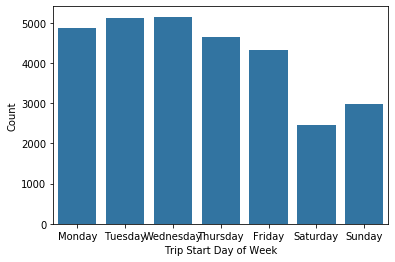

In [19]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_dayofweek'] = df['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=df, x='start_dayofweek',color=sb.color_palette()[0]);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

# Wednesday has the highest number of trips starting days

### Wednesday has the highest no of trip starting days

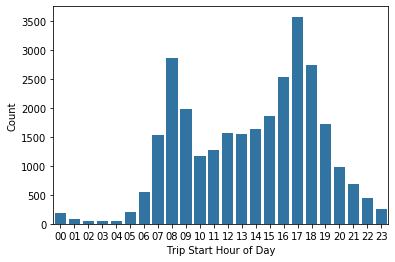

In [20]:

base_color=sb.color_palette()[0]
sb.countplot(data=df, x='start_hourofday',color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

#17 hours of day is highest

#### 17 hour of day is highest

## Looking for most common/popular starting stations

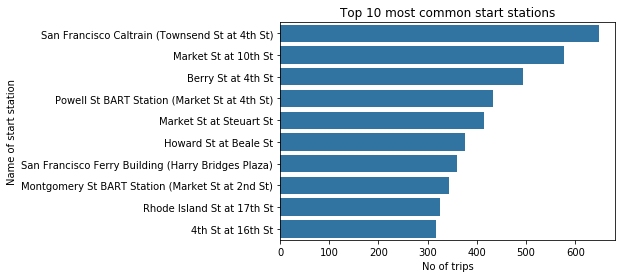

In [21]:
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 most common start stations');

#San Francisco Caltrain is the most popular starting station

San Francisco Caltrain is the most popular starting station

## Looking for least common/popular starting stations

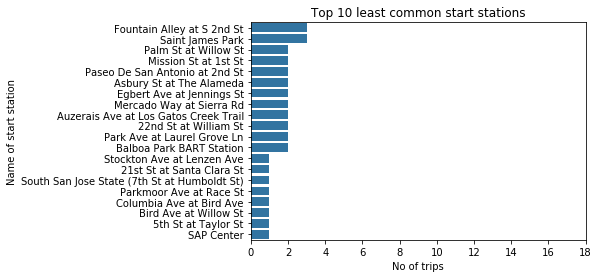

In [22]:
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[-20:], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 least common start stations');
x_labels = np.arange(0, 19, 2)
plt.xticks(x_labels, x_labels);

#Bird Ave at Willow st is the least popular starting station

#### Bird Ave at Willow st is the least popular starting station

## Looking for most popular ending station

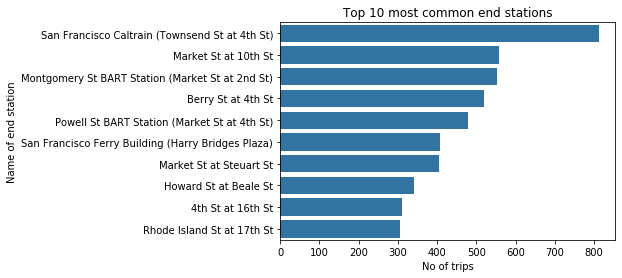

In [23]:
neighbourhood_counts = df['end_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'end_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 most common end stations');

#San Francisco Caltrain is the most popular ending station

#### San Francisco Caltrain is the most popular ending station

## Looking for least common/popular ending stations

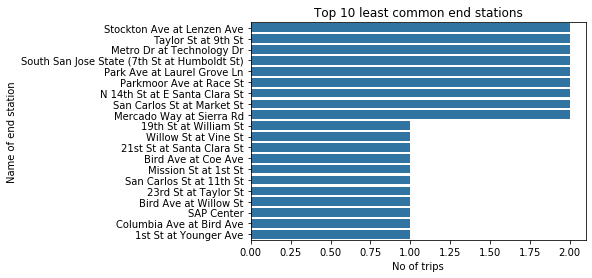

In [24]:
# Univariate Exploration
# A series of plots to first explore the trips distribution over hour-of-day, day-of-week and month.

neighbourhood_counts = df['end_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'end_station_name', order = neighbourhood_order[-20:], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 least common end stations');

#23rd St at Taylor St is the least popuar ending station

23rd St at Taylor St is the least popuar ending station

## Ploting graph to find maximum trip duration

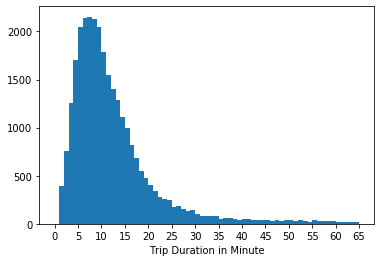

In [25]:
# Ploting graph to find maximum trip duration

bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

# no of counts  for 10 min trip duration is highest that is above 2000

#### no of counts  for 10 min trip duration is highest that is above 2000

## Bivariate Exploration

How does the trip duration distribution vary between customers and subscribers?

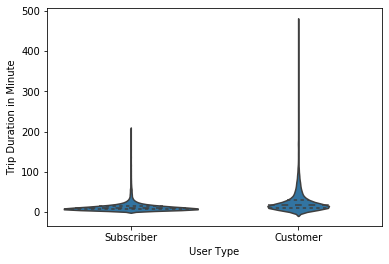

In [26]:
# Bivariate Exploration
# Trip duration vs customers/subscribers

sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

### Average Trip Duration on Weekdays

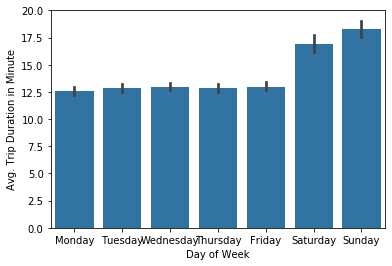

In [27]:
# Below code for barplot a bar graph for average trip duration against day of week

sb.barplot(data=df, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

# Some graph it is clear that sunday has the highest trip duration

#### Sunday has the highest trip duration

Weekly usage between customers and subscribers

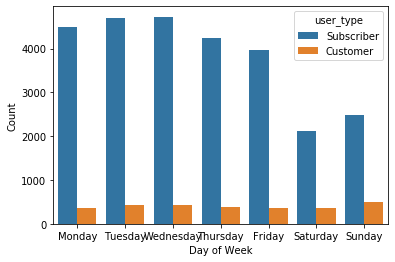

In [28]:
# Countplot shoes the count of subscribers/customers against week days

sb.countplot(data=df, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

# Wednesday has the highest for both subscriber and customer

#### Wednesday has the highest for both subscriber and customer

## Multivariate Exploration

### How does the average trip duration vary in weekdays between customers and subscribers?

#### Using Pointplot graph to visualize avearge trip duration for customers and subscribers

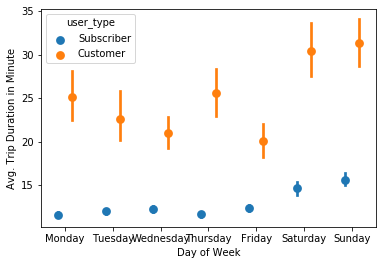

In [29]:
# Multivariate Exploration

# Using point plot to make estimate of central tendency for a trip duartion(in minutes) by the position of scatter plot points
# and provides some indication of the uncertainty around that estimate using error bars

sb.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

### How does the hourly usage vary during weekdays for customers and subscribers?

#### I am plotting heatmap to visualize relation between hourly usage during weekdays for cusomers as well as for subsriber

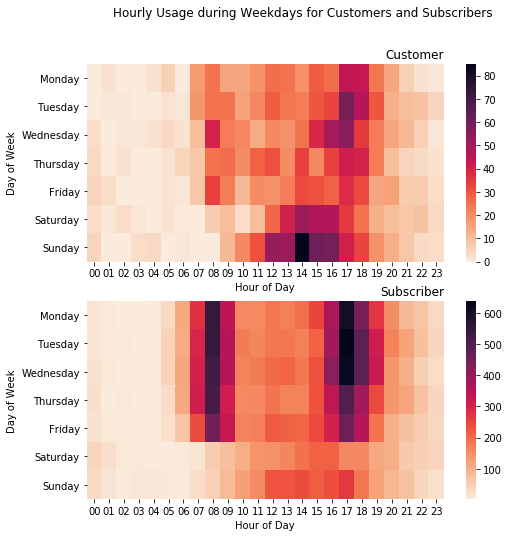

In [42]:
# I am plotting heatmap to visualize relation between hourly usage during weekdays for customers as well as subscribers

plt.figure(figsize=[8, 8]);
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

# Making heatmap for customers

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

# Making heatmap for Subscribers

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');